In [32]:
import numpy as np
from toqito.channels import partial_trace
from scipy.integrate import odeint

Global State

In [33]:
# Define constants and initial conditions
alpha = 1.0
beta = 1.0
gamma = 0.0
delta = 1.0

# Define the density matrix.
rho = np.array(
    [
        [abs(alpha)**2, alpha*np.conj(beta), alpha*np.conj(gamma), alpha*np.conj(delta)],
        [beta*np.conj(alpha), abs(beta)**2, beta*np.conj(gamma), beta*np.conj(delta)],
        [gamma*np.conj(alpha), gamma*np.conj(beta), abs(gamma)**2, gamma*np.conj(delta)],
        [delta*np.conj(alpha), delta*np.conj(beta), delta*np.conj(gamma), abs(delta)**2]
                 ]
)

# Pauli matrices
sigma_x = np.array([[0, 1], [1, 0]])
sigma_y = np.array([[0, -1j], [1j, 0]])
sigma_z = np.array([[1, 0], [0, -1]])

# Coupling constant
g = 1

# Define the Hamiltonian
H = np.kron(sigma_z, np.identity(2)) + np.kron(np.identity(2), sigma_z) + g * np.kron(sigma_x, sigma_x)

Observer State

In [45]:
# Compute the reduced density matrix.
rho_reduced = partial_trace(rho)

# Compute effective Hamiltonian (TODO)
H_eff = sigma_z + g * sigma_x

# Compute the commutator
commutator = np.matmul(H_eff, rho_reduced) - np.matmul(rho_reduced, H_eff)

# Use Liouvill Von Neumann equation to compute the time derivative of the density matrix
rho_dot = -1j * commutator

In [4]:
import numpy as np
import cmath

def calculate_entropy(alpha, beta, gamma, delta):
    # Calculate terms for D'
    term1 = np.abs(alpha)**2 + np.abs(beta)**2 + np.abs(gamma)**2 + np.abs(delta)**2
    term2 = np.abs(alpha)**2 * np.abs(gamma)**2 + np.abs(alpha)**2 * np.abs(delta)**2 + np.abs(beta)**2 * np.abs(gamma)**2 + np.abs(beta)**2 * np.abs(delta)**2
    Z = alpha * np.conj(gamma) - beta * np.conj(delta)
    term3 = np.abs(Z)**2 + Z * np.conj(beta * delta) + np.conj(Z) * beta * np.conj(delta) + np.abs(beta * np.conj(delta))**2
    
    # Calculate D'
    D_prime = term1**2 - 4 * (term2 - term3)
    
    # Calculate eigenvalues
    lambda_1 = 0.5 * (term1 + cmath.sqrt(D_prime))
    lambda_2 = 0.5 * (term1 - cmath.sqrt(D_prime))
    
    # Calculate entropy
    S = - lambda_1 * cmath.log(lambda_1) - lambda_2 * cmath.log(lambda_2)
    
    return S.real

# Example usage
alpha = 0.5
beta = 0.5
gamma = 0.5
delta = 0.2

entropy = calculate_entropy(alpha, beta, gamma, delta)
print(f"Entropy: {entropy}")


Entropy: 0.5292922700348979


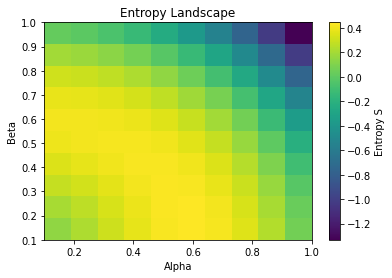

In [2]:
import numpy as np
import cmath
import matplotlib.pyplot as plt

# Function to calculate entropy
def calculate_entropy(alpha, beta, gamma, delta):
    term1 = np.abs(alpha)**2 + np.abs(beta)**2 + np.abs(gamma)**2 + np.abs(delta)**2
    term2 = np.abs(alpha)**2 * np.abs(gamma)**2 + np.abs(alpha)**2 * np.abs(delta)**2 + np.abs(beta)**2 * np.abs(gamma)**2 + np.abs(beta)**2 * np.abs(delta)**2
    Z = alpha * np.conj(gamma) - beta * np.conj(delta)
    term3 = np.abs(Z)**2 + Z * np.conj(beta * delta) + np.conj(Z) * beta * np.conj(delta) + np.abs(beta * np.conj(delta))**2
    D_prime = term1**2 - 4 * (term2 - term3)
    lambda_1 = 0.5 * (term1 + cmath.sqrt(D_prime))
    lambda_2 = 0.5 * (term1 - cmath.sqrt(D_prime))
    S = - lambda_1 * cmath.log(lambda_1) - lambda_2 * cmath.log(lambda_2)
    return S.real

# Parameter sweep
alphas = np.linspace(0.1, 1, 10)
betas = np.linspace(0.1, 1, 10)
gammas = np.linspace(0.1, 1, 10)
deltas = np.linspace(0.1, 1, 10)

S_values = np.zeros((10, 10, 10, 10))

for i, alpha in enumerate(alphas):
    for j, beta in enumerate(betas):
        for k, gamma in enumerate(gammas):
            for l, delta in enumerate(deltas):
                S_values[i, j, k, l] = calculate_entropy(alpha, beta, gamma, delta)

# Simple 2D plot for a slice of parameters
plt.imshow(S_values[:, :, 0, 0], extent=[0.1, 1, 0.1, 1], origin='lower', aspect='auto', cmap='viridis')
plt.colorbar(label='Entropy S')
plt.title("Entropy Landscape")
plt.xlabel("Alpha")
plt.ylabel("Beta")
plt.show()


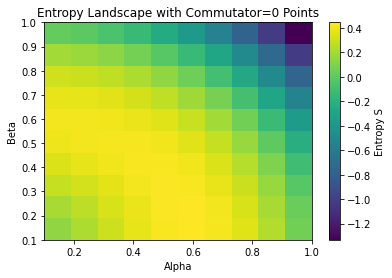

In [7]:
import numpy as np
import cmath
import matplotlib.pyplot as plt

# Function to check commutator condition
def check_commutator(alpha, beta, gamma, delta):
    return np.isclose(
        gamma * np.conj(alpha) - alpha * np.conj(gamma) + delta * np.conj(beta) - beta * np.conj(delta),
        0.1
    )

# Parameter sweep
alphas = np.linspace(0.1, 1, 20)
betas = np.linspace(0.1, 1, 20)

commutator_points = []

for i, alpha in enumerate(alphas):
    for j, beta in enumerate(betas):
        gamma, delta = 0.5, 0.2  # fixed for simplicity
        if check_commutator(alpha, beta, gamma, delta):
            commutator_points.append((alpha, beta))

# Simple 2D plot
plt.imshow(S_values[:, :, 0, 0], extent=[0.1, 1, 0.1, 1], origin='lower', aspect='auto', cmap='viridis')
plt.colorbar(label='Entropy S')
plt.title("Entropy Landscape with Commutator=0 Points")

# Highlight points where commutator is zero
for point in commutator_points:
    plt.scatter(*point, color='red')

plt.xlabel("Alpha")
plt.ylabel("Beta")
plt.show()
